In [1]:
import io
import tifffile
import quilt3 as q3
import matplotlib.pyplot as plt
import tensorflow as tf
import collections
import numpy as np
import tensorflow.keras.layers as layers
from tqdm import tqdm
import aicsimageio
from aicsimageio import AICSImage
from PIL import Image

In [2]:
list(q3.list_packages("s3://allencell"))

['aics/actk',
 'aics/aics_mnist',
 'aics/cell_line_exomes',
 'aics/cell_line_rnaseq',
 'aics/data_handoff_4dn',
 'aics/hipsc_12x_overview_image_dataset',
 'aics/hipsc_single_cell_image_dataset',
 'aics/hipsc_single_cell_image_dataset_supp_myh10',
 'aics/hipsc_single_edge_cell_image_dataset',
 'aics/hipsc_single_i1_cell_image_dataset',
 'aics/hipsc_single_i2_cell_image_dataset',
 'aics/hipsc_single_m1_cell_image_dataset',
 'aics/hipsc_single_m2_cell_image_dataset',
 'aics/hipsc_single_nonedge_cell_image_dataset',
 'aics/integrated_transcriptomics_structural_organization_hipsc_cm',
 'aics/label-free-imaging-collection',
 'aics/laminb1_sample_data',
 'aics/mitotic_annotation',
 'aics/nuclear_project_dataset_1',
 'aics/nuclear_project_dataset_2',
 'aics/nuclear_project_dataset_3',
 'aics/nuclear_project_dataset_4',
 'aics/pipeline_integrated_cell',
 'aics/pipeline_integrated_single_cell',
 'aics/segmenter_model_zoo',
 'aics/wtc11_hipsc_cardiomyocyte_scrnaseq_d0_to_d90',
 'aics/wtc11_linked

In [3]:
pipeline = q3.Package.browse(
    "aics/pipeline_integrated_single_cell",
    registry="s3://allencell"
)

Loading manifest: 100%|███████████████████| 179067/179067 [00:02<00:00, 60.1k/s]


In [38]:
$for file_name in pipeline["cell_images_2d"]:
    #print(file_name)

IndentationError: expected an indented block (1407051210.py, line 2)

In [5]:
num_files = len(pipeline["cell_images_2d"])
num_files

49325

In [35]:
import os
from urllib.parse import urlparse, unquote

In [36]:
ind = 0
for file_name in pipeline["cell_images_2d"]:
    if (ind == 0):
        entry = pipeline["cell_images_2d"][file_name].fetch(f"./AllenCell/{file_name}")
        uri_file_path = entry.get()
        file_path = unquote(urlparse(uri_file_path).path)
        #img = AICSImage(f"./AllenCell/{file_name}") => this works but relies on direct pathing :(
        img = AICSImage(file_path)
    ind += 1

100%|██████████████████████████████████████| 9.34k/9.34k [00:02<00:00, 4.17kB/s]


In [21]:
pipeline["cell_images_2d"]

(remote Package)
 └─00014711_13393_113057_reg_flat.png
 └─000804bd_14756_115283_reg_flat.png
 └─0008a13d_13419_113390_reg_flat.png
 └─000b4566_10343_86050_reg_flat.png
 └─000f1e42_13479_113566_reg_flat.png
 └─000fdbee_1925_75375_reg_flat.png
 └─0011ca9e_control_1250_Noise_flat.png
 └─001472d5_14702_114706_reg_flat.png
 └─0014d719_control_2008_Memb_flat.png
 └─0015abc1_control_337_Memb_flat.png
 └─00165e83_14355_108005_reg_flat.png
 └─00171967_control_1028_Memb_flat.png
 └─001719c2_2697_81279_reg_flat.png
 └─001730f4_13488_113622_reg_flat.png
 └─00174d4c_15106_27101_reg_flat.png
 └─0018fbb8_7778_50442_reg_flat.png
 └─0019b62a_12923_101065_reg_flat.png
 └─001aa838_13383_112953_reg_flat.png
 └─001b90cb_control_1264_Blank_flat.png
 └─001bfe59_2541_79278_reg_flat.png
 ...

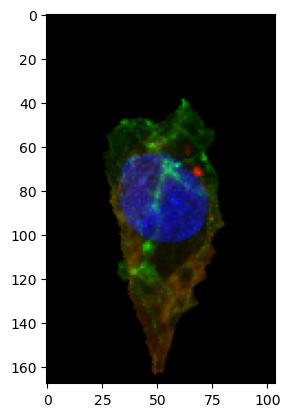

In [37]:
plt.imshow(img.data[0][0][0])